### Libraries for Random Forest

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from scipy.stats import *

### Read in the csv file containing the data of interest and show the head

In [144]:
enteroData = pd.read_csv('enteroData.csv')
print(enteroData.shape)
enteroData.head()

(3560, 9)


Sample Date  Enterococci Results  Year Population  Day Before Precipitation  \
0    6/1/2005                  4.0          7939571                       0.0   
1    6/1/2005                  4.0          7939571                       0.0   
2    6/1/2005                  4.0          7939571                       0.0   
3    6/1/2005                  4.0          7939571                       0.0   
4    6/8/2005                  4.0          7939571                       0.0   

   Day of Precipitation  Water Temperature  Sum Precip  Month  Year  
0                   0.0              15.23         0.0      6  2005  
1                   0.0              15.23         0.0      6  2005  
2                   0.0              15.23         0.0      6  2005  
3                   0.0              15.23         0.0      6  2005  
4                   0.0              17.89         0.0      6  2005

### Data Reduction for CSO Rainfall Data

CSOs typically occur when there is rain intensity of 0.1 in/hr, therefore under the assumption that the average storm lasts 30 minutes, 0.05 inches of rainfall during is possibly associated with this intensity and so will be used as the basis for reducing our data:

In [145]:
wetData = enteroData[(enteroData['Day Before Precipitation'] > 0.05) | (enteroData['Day of Precipitation'] > 0.05)]

print(wetData.shape)
wetData.head()

(1408, 9)


Sample Date  Enterococci Results  Year Population  \
54   5/30/2006                  4.0          7904335   
55   5/30/2006                  4.0          7904335   
56   5/30/2006                  4.0          7904335   
69   6/27/2006                  4.0          7904335   
70   6/27/2006                  4.0          7904335   

    Day Before Precipitation  Day of Precipitation  Water Temperature  \
54                      0.20                  0.00              15.92   
55                      0.20                  0.00              15.92   
56                      0.20                  0.00              15.92   
69                      0.06                  0.05              19.44   
70                      0.06                  0.05              19.44   

    Sum Precip  Month  Year  
54        0.20      5  2006  
55        0.20      5  2006  
56        0.20      5  2006  
69        0.11      6  2006  
70        0.11      6  2006

### Looking at average values to see how the correlations differ

In [146]:
enteroAvgData = pd.read_csv('enteroDataAvg.csv')

print(enteroAvgData.shape)
enteroAvgData.head()

(325, 9)


Sample Date  Enterococci Results  Year Population  Day Before Precipitation  \
0    6/1/2005             9.846154          7939571                       0.0   
1    6/8/2005            24.923077          7939571                       0.0   
2   6/14/2005             4.000000          7939571                       0.0   
3   6/20/2005            33.200000          7939571                       0.0   
4    7/5/2005             4.800000          7939571                       0.0   

   Day of Precipitation  Water Temperature  Sum Precip  Month  Year  
0                  0.00              15.23        0.00      6  2005  
1                  0.00              17.89        0.00      6  2005  
2                  0.00              19.17        0.00      6  2005  
3                  0.00              18.56        0.00      6  2005  
4                  0.04              21.23        0.04      7  2005

In [147]:
wetAvgData = enteroAvgData[(enteroAvgData['Day Before Precipitation'] > 0.05) | (enteroAvgData['Day of Precipitation'] > 0.05)]

print(wetAvgData.shape)
wetAvgData.head()

(114, 9)


Sample Date  Enterococci Results  Year Population  \
17   5/30/2006            52.000000          7904335   
20   6/27/2006             8.000000          7904335   
21    7/5/2006            16.615385          7904335   
23   7/18/2006            23.714286          7904335   
39   6/19/2007             6.857143          7908735   

    Day Before Precipitation  Day of Precipitation  Water Temperature  \
17                      0.20                  0.00              15.92   
20                      0.06                  0.05              19.44   
21                      0.00                  1.06              19.92   
23                      0.00                  0.44              22.11   
39                      0.00                  0.06              20.72   

    Sum Precip  Month  Year  
17        0.20      5  2006  
20        0.11      6  2006  
21        1.06      7  2006  
23        0.44      7  2006  
39        0.06      6  2007

Defining Dependent Variable

In [148]:
# The dependent variable, also called the label, is what we are trying to predict
# The labels DataFrame is first initiated like this for the visual representation
enteroLabels = pd.DataFrame({"Enterococci Results": enteroData['Enterococci Results']})
print(enteroLabels.shape)
enteroLabels.head()

(3560, 1)


Enterococci Results
0                  4.0
1                  4.0
2                  4.0
3                  4.0
4                  4.0

In [149]:
wetLabels = pd.DataFrame({"Enterococci Results": wetData['Enterococci Results']})
print(wetLabels.shape)
wetLabels.head()

(1408, 1)


Enterococci Results
54                  4.0
55                  4.0
56                  4.0
69                  4.0
70                  4.0

In [150]:
enteroAvgLabels = pd.DataFrame({"Enterococci Results": enteroAvgData['Enterococci Results']})
print(enteroAvgLabels.shape)
enteroAvgLabels.head()

(325, 1)


Enterococci Results
0             9.846154
1            24.923077
2             4.000000
3            33.200000
4             4.800000

In [151]:
wetAvgLabels = pd.DataFrame({"Enterococci Results": wetAvgData['Enterococci Results']})
print(wetAvgLabels.shape)
wetAvgLabels.head()

(114, 1)


Enterococci Results
17            52.000000
20             8.000000
21            16.615385
23            23.714286
39             6.857143

In [152]:
# This is done to put the dataframe back into the format for the model
labels = enteroData['Enterococci Results']
wetLabels = wetData['Enterococci Results']

avgLabels = enteroAvgData['Enterococci Results']
wetAvgLabels = wetAvgData['Enterococci Results']

Defining Independent Variables/Predictors

In [153]:
# Dropping dependent variable and Date
features = enteroData.drop('Enterococci Results', axis=1)
features = features.drop('Sample Date', axis=1)

print(features.shape)
features.head()

(3560, 7)


Year Population  Day Before Precipitation  Day of Precipitation  \
0          7939571                       0.0                   0.0   
1          7939571                       0.0                   0.0   
2          7939571                       0.0                   0.0   
3          7939571                       0.0                   0.0   
4          7939571                       0.0                   0.0   

   Water Temperature  Sum Precip  Month  Year  
0              15.23         0.0      6  2005  
1              15.23         0.0      6  2005  
2              15.23         0.0      6  2005  
3              15.23         0.0      6  2005  
4              17.89         0.0      6  2005

In [154]:
wetFeatures = wetData.drop('Enterococci Results', axis=1)
wetFeatures = wetFeatures.drop('Sample Date', axis=1)

print(wetFeatures.shape)
wetFeatures.head()

(1408, 7)


Year Population  Day Before Precipitation  Day of Precipitation  \
54          7904335                      0.20                  0.00   
55          7904335                      0.20                  0.00   
56          7904335                      0.20                  0.00   
69          7904335                      0.06                  0.05   
70          7904335                      0.06                  0.05   

    Water Temperature  Sum Precip  Month  Year  
54              15.92        0.20      5  2006  
55              15.92        0.20      5  2006  
56              15.92        0.20      5  2006  
69              19.44        0.11      6  2006  
70              19.44        0.11      6  2006

In [155]:
avgFeatures = enteroAvgData.drop('Enterococci Results', axis=1)
avgFeatures = avgFeatures.drop('Sample Date', axis=1)

print(avgFeatures.shape)
avgFeatures.head()

(325, 7)


Year Population  Day Before Precipitation  Day of Precipitation  \
0          7939571                       0.0                  0.00   
1          7939571                       0.0                  0.00   
2          7939571                       0.0                  0.00   
3          7939571                       0.0                  0.00   
4          7939571                       0.0                  0.04   

   Water Temperature  Sum Precip  Month  Year  
0              15.23        0.00      6  2005  
1              17.89        0.00      6  2005  
2              19.17        0.00      6  2005  
3              18.56        0.00      6  2005  
4              21.23        0.04      7  2005

In [156]:
wetAvgFeatures = wetAvgData.drop('Enterococci Results', axis=1)
wetAvgFeatures = wetAvgFeatures.drop('Sample Date', axis=1)

print(wetAvgFeatures.shape)
wetAvgFeatures.head()

(114, 7)


Year Population  Day Before Precipitation  Day of Precipitation  \
17          7904335                      0.20                  0.00   
20          7904335                      0.06                  0.05   
21          7904335                      0.00                  1.06   
23          7904335                      0.00                  0.44   
39          7908735                      0.00                  0.06   

    Water Temperature  Sum Precip  Month  Year  
17              15.92        0.20      5  2006  
20              19.44        0.11      6  2006  
21              19.92        1.06      7  2006  
23              22.11        0.44      7  2006  
39              20.72        0.06      6  2007

### Making Data into NumPy Arrays

In [157]:
features = np.array(features)
wetFeatures = np.array(wetFeatures)
avgFeatures = np.array(avgFeatures)
wetAvgFeatures = np.array(wetAvgFeatures)

labels = np.array(labels)
wetLabels = np.array(wetLabels)
avgLabels = np.array(avgLabels)
wetAvgFeatures = np.array(wetAvgFeatures)

### We will now split our dataset into training data and testing data

In [158]:
# As mentioned in article, we want our results to be reproducible, so we use a random_state = 42
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size = 0.2, random_state = 26)

print(trainFeatures.shape)
print(testFeatures.shape)
print(trainLabels.shape)
print(testLabels.shape)

(2848, 7)
(712, 7)
(2848,)
(712,)


## Creating the model

### Random Forest

We will first use base parameters to see the performance of the random forest under these conditions

In [159]:
params_rf = {'n_estimators':100, 
             'max_depth': 10,
             'min_samples_split':5,
             'min_samples_leaf':1,
             'max_features':None,
             'bootstrap': True,
             'ccp_alpha': 0}

rf = RandomForestRegressor(**params_rf)

rf.fit(trainFeatures,trainLabels)

RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=None,
                      min_samples_split=5)

Making Predictions

(0.7752471623810713, 8.482768196062011e-144)

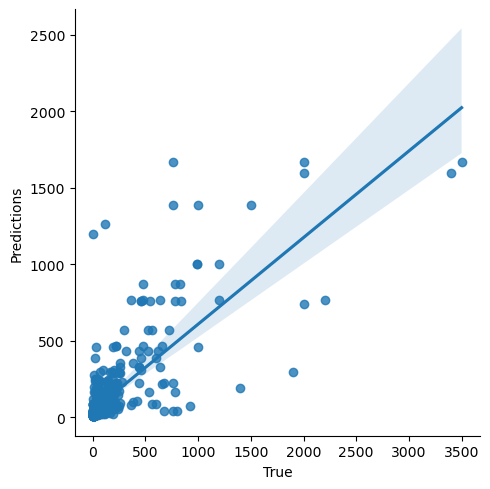

In [160]:
enteroPredictions = rf.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [161]:
print('Mean Squared Error:', round(mean_squared_error(testLabels, enteroPredictions), 2), 'cells/100mL.')
print('Mean Absolute Error:', round(mean_absolute_error(testLabels, enteroPredictions), 2), 'cells/100mL.')

Mean Squared Error: 37270.99 cells/100mL.
Mean Absolute Error: 67.66 cells/100mL.


We can then look to find optimal hyperparameters by doing the following:

In [162]:
# Using methods from class
grid = {'n_estimators': [20,40,80,160], #[int(x) for x in np.linspace(start=100, stop=4000, num=20)],
        'max_depth': [4, 8, 16, 32], #[int(x) for x in np.linspace(start= 4, stop=1504, num=20)],
        'min_samples_split': [6, 10, 20, 30], #[int(x) for x in np.linspace(start= 2, stop=150, num=2)],
        'min_samples_leaf': [3, 10, 20, 30], #[int(x) for x in np.linspace(start= 1, stop=150, num=2)],
        'max_features': ['None', 'auto'],
        'bootstrap': [True, False],
        'ccp_alpha': [0, 0.01, 0.1]}

rf_grid = GridSearchCV(RandomForestRegressor(), param_grid = grid, cv = 3, verbose=3)
rf_entero = rf_grid.fit(trainFeatures,trainLabels)
print("The best hyperparameters: \n",rf_entero.best_params_)

Fitting 3 folds for each of 3072 candidates, totalling 9216 fits
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimato

[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END boo

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END 

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.327 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.284 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.343 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.323 total time=   0.0s
[CV 2/3] END b

[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.330 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.266 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.290 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.312 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.266 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.293 total time=   0.2s
[CV 1/3

[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.297 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.242 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.261 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.287 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.234 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.243 total time=   0.0s
[CV 

[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.224 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.288 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.187 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.210 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.287 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.191 total time=   0.1s
[CV 

[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3] END bootstra

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 2/3] END boo

[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstr

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.468 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.382 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.440 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.471 total time=   0.3s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.386 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=0.387 total time=   0.0s
[CV 2/3] END

[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.449 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.390 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.334 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.447 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.385 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.325 total time=   0.0s
[CV 

[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.293 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.367 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.308 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.283 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.362 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.306 total time=   0.1s
[CV 

[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.231 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.336 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.234 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.226 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.327 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.226 total time=   0.2s
[C

[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END 

[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END

[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.380 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.423 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.519 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.386 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.458 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.511 total time=   0.2s
[CV 3/3] E

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.398 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.328 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.459 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.404 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.345 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.449 total time=   0.3s
[CV

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.303 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.371 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.302 total time=   0.3s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.293 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.374 total time=   0.0s


[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.328 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.231 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.222 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.329 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.226 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.232 total time=   0.0

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END b

[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3

[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3] END b

[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.388 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.450 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.525 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.390 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.447 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.515 total time=   0.2s
[CV 3/3] E

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.401 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.341 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.445 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.408 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.343 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.453 total time=   0.3s
[CV

[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.296 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.291 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.370 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.302 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.290 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.371 total time=   0.0s


[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.328 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.233 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.226 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.317 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.233 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.226 total time=   0.0

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   

[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.290 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.281 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.346 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.304 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.286 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.337 total time=   0.1

[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.291 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.330 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.258 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.299 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.325 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.273 total tim

[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.258 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.305 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.235 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.260 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.291 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.227 total 

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.283 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.186 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.208 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.277 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.185 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.206 total

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s


[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.461 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.486 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.383 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.432 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.486 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.388 total time=   0.1

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.394 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.338 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.449 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.393 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.346 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.442 total time

[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.298 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.371 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.306 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.289 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.368 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.299 total tim

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.223 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.218 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.331 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.226 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.222 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.316 total t

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total ti

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.526 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.375 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.429 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.498 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.388 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.440 total time=

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.406 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.351 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.463 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.405 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.341 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.453 tota

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.289 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.374 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.304 total time=   0.3s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.291 total time=   0.3s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.375 t

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.326 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.226 total time=   0.3s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.226 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.319 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.230 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.224

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total tim

[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0

[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.381 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.413 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.511 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.394 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.428 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.514 total time=

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.394 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.340 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.451 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.396 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.347 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.451 tota

[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.298 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.287 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.370 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.297 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.290 total time=   0.3s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.344 t

[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.329 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.234 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.231 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.322 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.232 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.214

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3

[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.308 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.283 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.339 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.308 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.276 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.342 total time=   0.1s
[CV 

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.325 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.265 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.291 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.323 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.269 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.297 total time=   

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.305 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.236 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.258 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.287 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.255 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.254 total time=

[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.208 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.296 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.180 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.206 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.272 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.180 total time=

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3]

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0.0s
[C

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 

[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.395 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.445 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.470 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.388 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.423 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.475 total time=   0.1s
[CV 

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.381 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.339 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.441 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.399 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.336 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.432 total time=   0.

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.300 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.290 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.363 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.302 total time=   0.3s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.291 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.373 total time=  

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.326 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.230 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.221 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.318 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.223 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.239 total time=

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.

[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[C

[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.370 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.419 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.516 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.385 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.448 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.514 total time=   0.2

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.403 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.331 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.455 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.404 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.333 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.453 total time

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.304 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.292 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.369 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.301 total time=   0.3s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.292 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.370 total t

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.324 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.231 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.228 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.337 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.221 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.218 total

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.450 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.513 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.398 total time=   0.0s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.406 total time=   0.1s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.511 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.393 total time=   0.1

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.394 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.329 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.450 total time=   0.2s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.401 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.340 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.448 total time

[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.307 total time=   0.1s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.292 total time=   0.1s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.367 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.308 total time=   0.3s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.290 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.361 total t

[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.328 total time=   0.3s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.228 total time=   0.2s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.229 total time=   0.2s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.320 total time=   0.0s
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.224 total time=   0.0s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.224 total

[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END 

[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3

[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3]

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.252 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.211 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.323 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.252 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.211 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.323 total time=   0.1s
[CV 1/3] E

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.225 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.202 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.323 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.225 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.202 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.323 total time=   0.2s
[

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.185 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.172 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.254 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.185 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.172 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.254 total time=   0.0

[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.254 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.215 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.170 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.254 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.215 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.170 total time=   0.0

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END 

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3

[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.429 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.424 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.374 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.429 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.424 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.374 total time=   0.1s
[CV 1/3] E

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.307 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.356 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.364 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.307 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.356 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.364 total time=   0.3s
[

[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.284 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.275 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.286 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.284 total time=   0.3s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.275 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.286 total time=   0.0s

[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.241 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.288 total time=   0.3s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.255 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.241 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.288 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.255 total time=   0.1

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 

[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.524 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.383 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.434 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.383 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.434 total time=   0.2s
[CV 

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.316 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.379 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.369 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.316 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.379 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.369 total time=   0.2

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.279 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.287 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.279 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.293 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.287 total time=   

[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.289 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.257 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.242 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.289 total time=   0.3s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.257 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.242 total time= 

[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3]

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 

[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.383 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.434 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.383 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.434 total time=   0.2s
[CV 

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.316 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.379 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.369 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.316 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.379 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.369 total time=   0.2

[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.293 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.287 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.279 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.287 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.279 total time=   0.

[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.257 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.242 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.289 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.257 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.242 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.289 total time=   

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   

[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total tim

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.323 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.252 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.211 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.323 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.252 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.211 total time=

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.323 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.225 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.202 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.323 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.225 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.202 tot

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.185 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.172 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.254 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.185 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.172 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.254 to

[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.170 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.254 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.215 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.170 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.254 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.215 t

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.374 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.429 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.424 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.374 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.429 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.424 total time=

[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.356 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.364 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.307 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.356 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.364 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.307 tota

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.275 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.286 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.284 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.275 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.286 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.284 to

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.288 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.255 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.241 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.288 total time=   0.3s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.255 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.241 

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total ti

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan to

[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total t

[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.383 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.434 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.383 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.434 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.524 total

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.316 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.379 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.369 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.316 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.379 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.369

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.279 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.293 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.287 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.279 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.287

[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.242 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.289 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.257 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.242 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.289 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.25

[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total tim

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan to

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total

[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.383 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.434 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.383 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.434 total

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.316 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.379 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.369 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.316 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.379 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.369

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.279 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.293 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.287 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.279 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.287

[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.257 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.242 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.289 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.257 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.242 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.289

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[C

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0

[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.323 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.252 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.211 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.323 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.252 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.211 total time=   0.1

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.225 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.202 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.323 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.225 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.202 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.323 total ti

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.185 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.172 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.254 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.185 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.172 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.254 total

[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.254 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.215 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.170 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.254 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.215 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.170 total

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[C

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total time=   0

[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[C

[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.374 total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.429 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.424 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.374 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.429 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.424 total time=   0.1

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.356 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.364 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.307 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.356 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.364 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.307 total time

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.275 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.286 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.284 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.275 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.286 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.284 total ti

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.241 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.288 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.255 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.241 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.288 total time=   0.3s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.255 total t

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   

[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total ti

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total tim

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.434 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.383 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.434 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.383 total time=

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.316 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.379 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.369 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.316 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.379 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.369 total

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.279 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.287 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.279 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.293 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.287 to

[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.289 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.257 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.242 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.289 total time=   0.3s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.257 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.242 

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=nan total time=   0

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=nan total tim

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=

[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.524 total time=   0.0s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.384 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.434 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.524 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.384 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.434 total time=

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.316 total time=   0.1s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.379 total time=   0.1s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.369 total time=   0.1s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.316 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.379 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.369 total

[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.279 total time=   0.2s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.2s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.287 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.279 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.293 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.287 to

[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.289 total time=   0.2s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.257 total time=   0.3s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.242 total time=   0.3s
[CV 3/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.289 total time=   0.3s
[CV 1/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.257 total time=   0.0s
[CV 2/3] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.242 

/Users/kevincardenas/opt/anaconda3/envs/keras/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4608 fits failed out of a total of 9216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2304 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kevincardenas/opt/anaconda3/envs/keras/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kevincardenas/opt/anaconda3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/kevincardenas/opt/anaconda3/envs/keras/lib/python3.8/site-packages/joblib/pa

The best hyperparameters: 
 {'bootstrap': True, 'ccp_alpha': 0.1, 'max_depth': 32, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}


(0.7835823437788362, 6.601898183639162e-149)

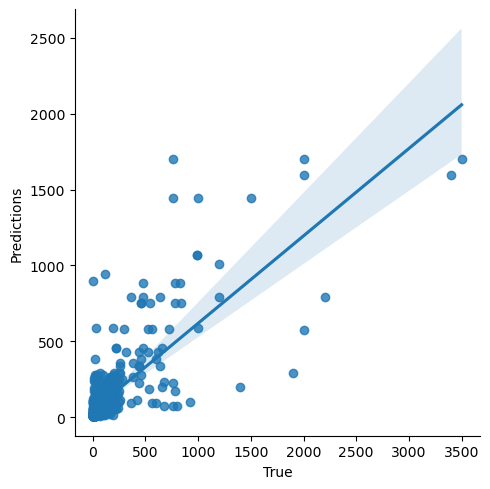

In [163]:
enteroPredictions = rf_entero.predict(testFeatures)

comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)

stats.pearsonr(comp['True'], comp['Predictions'])

In [164]:
error = (enteroPredictions - testLabels)**2
print('Mean Squared Error:', round(np.mean(error), 2), 'cells/100mL.')

error = abs(enteroPredictions - testLabels)
print('Mean Absolute Error:', round(np.mean(error), 2), 'cells/100mL.')

Mean Squared Error: 36080.6 cells/100mL.
Mean Absolute Error: 66.49 cells/100mL.


### Now an analysis will be done on whether or not the model can improve at higher values, if values below the CSO threshold are omitted

In [165]:
# As mentioned in article, we want our results to be reproducible, so we use a random_state = 26
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(wetFeatures, wetLabels, test_size = 0.2, random_state = 26)

In [166]:
wetRf = RandomForestRegressor(**params_rf)

wetRf.fit(trainFeatures,trainLabels)

RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=None,
                      min_samples_split=5)

(0.6086433309316607, 5.696150265870803e-30)

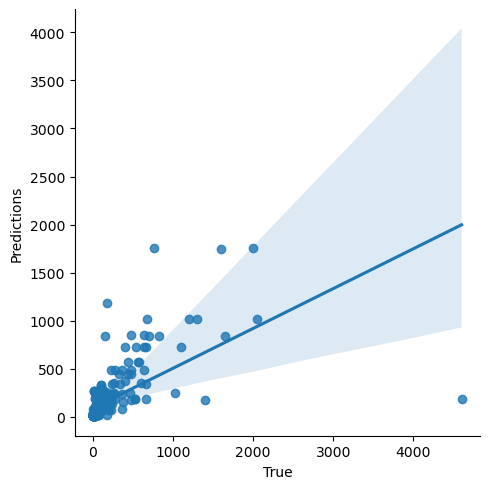

In [167]:
enteroPredictions = wetRf.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [168]:
error = (enteroPredictions - testLabels)**2
print('Mean Squared Error:', round(np.mean(error), 2), 'cells/100mL.')

error = abs(enteroPredictions - testLabels)
print('Mean Absolute Error:', round(np.mean(error), 2), 'cells/100mL.')

Mean Squared Error: 101441.12 cells/100mL.
Mean Absolute Error: 94.24 cells/100mL.


In [169]:
wetRf_grid = GridSearchCV(RandomForestRegressor(), param_grid = grid, cv = 5, verbose=3)
wetRf_entero = wetRf_grid.fit(trainFeatures,trainLabels)
print("The best hyperparameters: \n",rf_entero.best_params_)


Fitting 5 folds for each of 3072 candidates, totalling 15360 fits
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimat

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstr

[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END

[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END boo

[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END 

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END boo

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.551 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.586 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=0.576 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=0.496 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=0.390 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=0.529 total time=   0.0s
[CV 5/5] E

[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=80;, score=0.631 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=80;, score=0.495 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=80;, score=0.472 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=80;, score=0.501 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=80;, score=0.551 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.626 total time=   0.1s
[CV 2/5] 

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.603 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.625 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.558 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.417 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.505 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.610 total time=   0.0s
[CV 

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.427 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.540 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.401 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.427 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.398 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.427 total time=   0.1s
[CV 1

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.422 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.537 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.402 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.426 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.407 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.430 total time=   0.1s
[CV 

[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.504 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.365 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.402 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.382 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.407 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.513 total time=   0.1s
[CV 

[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END bootst

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END bootstrap

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END bo

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END bo

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END boo

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.654 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.534 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.417 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.672 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.702 total time=   0.0s
[CV 1/5] END bo

[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.578 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.438 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.582 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.688 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.676 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.564 total time=   0.2s
[CV 3/5]

[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.489 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.555 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.672 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.589 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.465 total time=   0.0s
[CV 

[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.503 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.545 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.597 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.670 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.553 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.511 total time=   0.2s
[

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.419 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.463 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.564 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.420 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.456 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.418 total time=   0.1s
[CV 

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.419 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.530 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.383 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.421 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.373 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.446 total time=   0.0s
[CV 

[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.408 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.396 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.423 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.532 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.380 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.419 total time=   0.1s
[

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END bo

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] E

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END b

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.525 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.441 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.651 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.687 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.640 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.533 total time=   0.2s
[C

[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.468 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.552 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.663 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.663 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.588 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.448 total time=   0.1s
[CV 

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.558 total time=   0.2s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.669 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.657 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.535 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.494 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.556 total time=   0

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.424 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.449 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.553 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.421 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.448 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.433 total time=   0.1

[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.453 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.425 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.468 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.526 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.379 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.388 total time=   0.0

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.403 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.422 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.529 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.378 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.413 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.403 total time=   0.1

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END boo

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END bo

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] E

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.622 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.510 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.401 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.640 total time=   0.0s
[CV 5/5]

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=0.566 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=0.695 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.667 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.562 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.462 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.577 total time=   0.1s
[CV 

[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.671 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.676 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.600 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.487 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.549 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.655 total time=   0.0

[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.559 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.507 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.551 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.613 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.677 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.546 total time=   0

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.449 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.460 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.564 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.412 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.457 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.440 total time=   0.0

[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.395 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.422 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.535 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.380 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.411 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.402 total time=   0.1s


[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.391 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.423 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.528 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.381 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.424 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.391 total time=   0.0

[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[C

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.542 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.582 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.579 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.501 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.374 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.552 total time=   0.1

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.391 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.493 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.609 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.617 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.514 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.464 total ti

[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.566 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.428 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.488 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.600 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.622 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.554 tot

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.382 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.424 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.525 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.391 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.433 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.395 total time=

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.434 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.406 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.432 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.554 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.397 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.446 to

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.398 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.507 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.361 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.398 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.383 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.403 total

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.405 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s


[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=40;, score=0.442 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=40;, score=0.652 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=40;, score=0.697 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.623 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.533 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.422 total time=

[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.531 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.510 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.569 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.620 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.658 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.577 total t

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.679 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.658 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.587 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.457 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.561 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.670 total

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.462 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.547 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.416 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.435 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.428 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.471 total

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=40;, score=0.462 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.562 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.419 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.444 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.426 total

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.414 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.394 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.423 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.512 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.377 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.388 to

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total ti

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total ti

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.654 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.553 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.459 total ti

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=0.580 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=0.688 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.677 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.561 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.444 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.566 total

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.473 total time=   0.2s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.564 total time=   0.2s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=0.669 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.646 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.588 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.461

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=40;, score=0.631 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.671 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.541 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.519 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.546 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.619

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.464 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.572 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.414 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.445 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.419 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.47

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.412 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.429 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.539 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.375 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.394 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.388 total

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.412 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.391 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.422 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.530 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.376 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0

[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total tim

[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.647 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.528 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.406 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.643 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.699 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.632 total time

[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.547 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.481 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.545 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.648 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.680 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.561 total

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.453 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.552 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.666 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.666 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.592 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.453 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.419 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.463 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.556 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.413 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.453 total

[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.416 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.457 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.428 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.464 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.545 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0

[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.403 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.421 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.538 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.387 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.406 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.400

[CV 3/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.409 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.392 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.426 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5]

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.390 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.547 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.597 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.581 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.495 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.387 total time=   

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.474 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.600 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.615 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.557 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.418 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.491 total time=   0.1

[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.425 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.479 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.598 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.608 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.485 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.440 total ti

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.396 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.433 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.534 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.399 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.431 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.403 total time=

[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.429 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.406 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.429 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.515 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.367 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.407 total time=

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.378 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.413 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.512 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.366 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.393 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.388 total time=

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] E

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.628 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.522 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.398 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.641 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.703 total time=   0.0s
[CV

[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.572 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.441 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.568 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.691 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.675 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.575 total time=   0

[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.446 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.563 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.647 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.659 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.588 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.435 total time=

[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.514 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.557 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.613 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.670 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.538 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.509 total ti

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.422 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.460 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.568 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.415 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.461 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.421 total time=

[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.406 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.399 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.420 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.539 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.380 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.421 total time=

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.403 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.415 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.529 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.375 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.402 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.398 total time=

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s


[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0

[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.635 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.527 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.459 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.652 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.698 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.630 total time=   0.

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.687 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.674 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.542 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.499 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.569 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.611 total time

[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.582 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.462 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.561 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.664 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.668 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.595 tot

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.417 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.473 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.569 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.412 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.445 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.442 total time=

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.414 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.470 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.567 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.418 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.456 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.419 t

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.423 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.519 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.376 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.422 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.402 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.425 total

[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.526 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.379 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.396 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.395 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.428 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan tota

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[C

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.

[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.535 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.446 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.644 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.692 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.644 total time=   0.2s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.534 total tim

[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.462 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.564 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.676 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.668 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.583 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.456 total time=

[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.585 total time=   0.2s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.451 total time=   0.2s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.552 total time=   0.2s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.669 total time=   0.2s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.685 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.575 t

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.456 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.570 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.417 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.454 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.432 total time=   0.1s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.468 total

[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.469 total time=   0.1s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.498 total time=   0.0s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.390 total time=   0.0s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.422 total time=   0.0s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.401 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=0.420 total tim

[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.386 total time=   0.0s
[CV 5/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.419 total time=   0.0s
[CV 1/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.535 total time=   0.1s
[CV 2/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.381 total time=   0.1s
[CV 3/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.409 total time=   0.1s
[CV 4/5] END bootstrap=True, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.399 total

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END boo

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END bo

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] E

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.514 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.498 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.261 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.473 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.545 total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=40;, score=0.551 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.514 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.497 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.306 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.471 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.551 total time=   0.1s
[CV 

[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.496 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.499 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.293 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.448 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.548 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.496 total time=   0.1

[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.545 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.560 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.293 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.413 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.560 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.550 total time=  

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.560 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.550 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.539 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.348 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.413 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.560 total time=   0.1

[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.487 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.369 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.374 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.345 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.406 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.487 total time=   0.1

[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.487 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.369 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.374 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.345 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.406 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END bo

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] E

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] END b

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=40;, score=0.690 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.601 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.518 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.403 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.588 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.690 total time=   0.1s
[CV 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.715 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.590 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.521 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.365 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.573 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.668 total time=   0.0s
[CV

[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.521 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.365 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.573 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.668 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.590 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.521 total time=   0

[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.554 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=40;, score=0.502 total time=   0.0

[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.370 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.502 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.649 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.644 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.554 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.370 total time=   

[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=40;, score=0.435 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.425 total time=   0.1

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] E

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5] 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.616 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.520 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.418 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.598 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.698 total time=   0.0s
[CV

[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.520 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.437 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.594 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.698 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.622 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.520 total time=   0

[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.365 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.574 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.668 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.590 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.524 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.365 total time=

[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.338 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.525 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.665 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.633 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.578 total time=   0.2s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.338 total ti

[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.555 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.502 total time=

[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.425 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.435 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.425 total time=  

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.435 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.557 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.376 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.363 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.435 total time=

[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 3/5]

[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 1/5]

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.616 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.520 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.418 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.598 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.698 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.616 total time=   0.2s
[CV

[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.390 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.531 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.717 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.657 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.581 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.390 total time=   0.0

[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.365 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.574 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.668 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.590 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.524 total time=   0.2s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.365 total ti

[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.644 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.555 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.370 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.502 total time=   0.1

[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.649 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.555 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.502 total tim

[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.435 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.425 total time=

[CV 3/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.425 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.435 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.498 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.261 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.473 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.545 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.514 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=0.498 tot

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=40;, score=0.548 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.496 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.499 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.293 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.448 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=80;, score=0.548 total

[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.448 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=0.548 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.545 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.560 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.293 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=0.4

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.539 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.348 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.413 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.560 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.550 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=0.5

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=40;, score=0.406 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.487 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.369 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.374 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.345 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.406 total

[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.345 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=0.406 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.487 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.369 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.374 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=0.3

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.518 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.403 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.588 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.690 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.601 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.518 total tim

[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.393 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.531 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.715 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=80;, score=0.657 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=80;, score=0.580 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=80;, score=0.393 total

[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.365 total time=   0.2s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.573 total time=   0.2s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.668 total time=   0.2s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.590 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.521 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=0.

[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.644 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.554 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.370 total

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.554 total time=   0.2s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.370 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.649 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0

[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.435 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.425

[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.425 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.435 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=nan total tim

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total tim

[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=nan total

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total tim

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan tota

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan tota

[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.616 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.520 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.418 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.598 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.698 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.616 tota

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.581 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.390 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.531 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.717 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.657 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.581

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.524 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.365 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.574 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.668 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.590 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, sco

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.665 total time=   0.2s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.555 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.6

[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.644 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.555 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score

[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.425 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.435 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score

[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.435 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total tim

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan tota

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan tota

[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.616 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.520 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.418 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.598 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.698 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.616 tota

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.581 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.390 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.531 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.717 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.657 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.581

[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.524 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.365 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.574 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.668 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.590 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, sco

[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.665 total time=   0.2s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.555 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.6

[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.644 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.555 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score

[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.425 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.435 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score

[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.435 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.01, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[C

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.

[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.473 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=40;, score=0.545 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.514 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.498 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.261 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.473 total time=   0.1

[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.471 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.551 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.564 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.560 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.293 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.413 total tim

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.548 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.496 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.499 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.293 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.448 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.548 total

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.560 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.550 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.539 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.348 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.413 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=0.560 total tim

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.560 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.550 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.539 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.348 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.413 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=80;, score=0.560 total

[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.345 total time=   0.2s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.406 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.487 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.369 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.374 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=0.345 total

[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.369 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.374 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.345 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.406 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.487 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=4, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.369 tot

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[C

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=20;, score=nan total time=   0.

[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=40;, score=0.588 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=40;, score=0.690 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.601 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.518 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.403 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=80;, score=0.588 total time=

[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.393 total time=   0.2s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.531 total time=   0.2s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=0.715 total time=   0.2s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.590 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.521 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=0.365 total ti

[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.365 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.573 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=40;, score=0.668 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.590 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.521 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.365 total

[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.554 total time=   0.2s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.370 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.502 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=160;, score=0.649 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=20;, score=0.554 total

[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.644 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.554 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.370 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.502 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=80;, score=0.649 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=160;, score=0.644 tota

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=0.435 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.557 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.376 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.363 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=8, max_features=auto, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=0.435 tota

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=3, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=20;, score=nan total time

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=nan total time

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=20;, score=nan total time=

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=None, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.616 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.520 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.418 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.598 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=20;, score=0.698 total time

[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.520 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.437 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.594 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=80;, score=0.698 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.622 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=3, min_samples_split=20, n_estimators=160;, score=0.520 tot

[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.365 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.574 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=0.668 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.590 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.524 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.365

[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.578 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.338 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.525 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.665 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.633 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=0.5

[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=20;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.555 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=40;, score=0.502

[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.425 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=80;, score=0.435 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.376 total time=   0.2s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=6, n_estimators=160;, score=0.425 t

[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=40;, score=0.435 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=16, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.425

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=3, min_samples_split=20, n_estimators=20;, score=nan total time=   0.

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=6, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=10, n_estimators=20;, score=nan total time=

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=10, min_samples_split=30, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=6, n_estimators=20;, score=nan total time=   0

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=nan total time

[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=10, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=None, min_samples_leaf=30, min_samples_split=20, n_estimators=20;, score=nan total time

[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.616 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.520 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.418 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.598 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=80;, score=0.698 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=160;, score=0.616 total time

[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.390 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.531 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=20;, score=0.717 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.657 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.581 total time=   0.0s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=3, min_samples_split=30, n_estimators=40;, score=0.390 total

[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.524 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.365 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.574 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.668 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.590 total time=   0.2s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=160;, score=0.5

[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.370 total time=   0.0s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.502 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=40;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.644 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.555 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=6, n_estimators=80;, score=0.370 total

[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.555 total time=   0.2s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.370 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.502 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators=160;, score=0.649 total time=   0.1s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=20, min_samples_split=30, n_estimators=20;, score=0

[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.425 total time=   0.0s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=40;, score=0.435 total time=   0.0s
[CV 1/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.557 total time=   0.1s
[CV 2/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.376 total time=   0.1s
[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.425

[CV 3/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.363 total time=   0.1s
[CV 4/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.425 total time=   0.1s
[CV 5/5] END bootstrap=False, ccp_alpha=0.1, max_depth=32, max_features=auto, min_samples_leaf=30, min_samples_split=30, n_estimators=160;, score=0.435 total time=   0.1s
The best hyperparameters: 
 {'bootstrap': True, 'ccp_alpha': 0.1, 'max_depth': 32, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 80}


/Users/kevincardenas/opt/anaconda3/envs/keras/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7680 fits failed out of a total of 15360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3840 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kevincardenas/opt/anaconda3/envs/keras/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kevincardenas/opt/anaconda3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/kevincardenas/opt/anaconda3/envs/keras/lib/python3.8/site-packages/joblib/p

(0.612671381858146, 1.8870550711171182e-30)

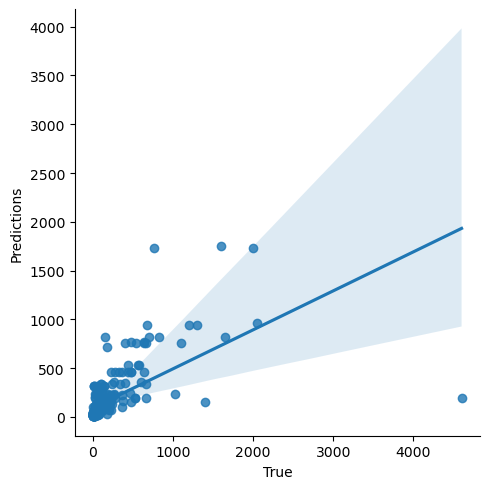

In [170]:
enteroPredictions = wetRf_entero.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [171]:
error = (enteroPredictions - testLabels)**2
print('Mean Squared Error:', round(np.mean(error), 2), 'cells/100mL.')

error = abs(enteroPredictions - testLabels)
print('Mean Absolute Error:', round(np.mean(error), 2), 'cells/100mL.')

Mean Squared Error: 100046.91 cells/100mL.
Mean Absolute Error: 97.48 cells/100mL.


### Applying Original RF to wet data

(0.681373769525048, 7.856688763268729e-40)

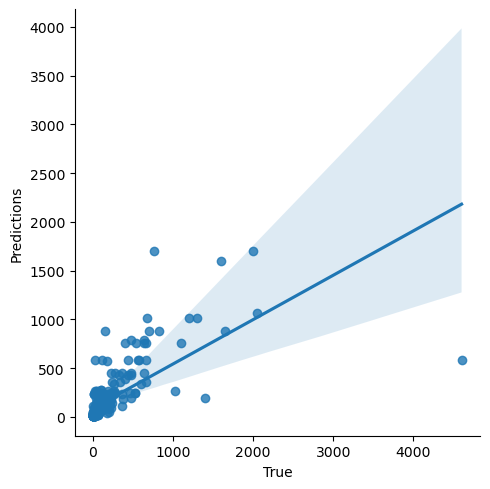

In [172]:
enteroPredictions = rf_entero.predict(testFeatures)
comp = pd.DataFrame({'True': testLabels, 'Predictions':enteroPredictions})

sns.lmplot(x = 'True', y='Predictions', data=comp)
stats.pearsonr(comp['True'], comp['Predictions'])

In [173]:
error = (enteroPredictions - testLabels)**2
print('Mean Squared Error:', round(np.mean(error), 2), 'cells/100mL.')

error = abs(enteroPredictions - testLabels)
print('Mean Absolute Error:', round(np.mean(error), 2), 'cells/100mL.')

Mean Squared Error: 85593.15 cells/100mL.
Mean Absolute Error: 89.48 cells/100mL.
